<a href="https://colab.research.google.com/github/hibatallahgamal/DICEGAME/blob/main/IDS_ARTCL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Application Of KNN On Intrusion Detection

#### First let's start with importing the Data (CICIDS2017 is the dataset we are working on)

In [2]:
# import pandas to load dataset
import pandas as pd
df = pd.read_csv('/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [4]:
# TO show the first 5 line of our data
df.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [5]:
# Details about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20264 entries, 0 to 20263
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             20264 non-null  int64  
 1    Flow Duration                20264 non-null  int64  
 2    Total Fwd Packets            20264 non-null  int64  
 3    Total Backward Packets       20264 non-null  int64  
 4   Total Length of Fwd Packets   20264 non-null  int64  
 5    Total Length of Bwd Packets  20264 non-null  int64  
 6    Fwd Packet Length Max        20264 non-null  int64  
 7    Fwd Packet Length Min        20264 non-null  int64  
 8    Fwd Packet Length Mean       20264 non-null  float64
 9    Fwd Packet Length Std        20264 non-null  float64
 10  Bwd Packet Length Max         20264 non-null  int64  
 11   Bwd Packet Length Min        20264 non-null  int64  
 12   Bwd Packet Length Mean       20264 non-null  float64
 13   

#### Next , we  analyse our class and the column 'Label' to get more informations about our data 

In [6]:
# using value_counts method as the best option
df[' Label'].value_counts()

BENIGN    18883
DDoS       1380
Name:  Label, dtype: int64

#### As we can see our class if based on two options :
- DDos (Attaque Packet)
- BENIGN (Normal Packet)

Now we'll change these values into numerique numbers (1 for DDos and 0 for BENIGN )

In [7]:
from sklearn.metrics import confusion_matrix
# replace method in pandas is the best option
df[' Label'].replace(['BENIGN' , 'DDoS'] , [0 , 1] , inplace = True)

In [8]:
# let's show the new label to visualize the results
df[' Label'].value_counts()

0.0    18883
1.0     1380
Name:  Label, dtype: int64

In [48]:
# Now we'll replace NAN values with 0
df.replace('NaN',0.0, inplace=True)
df.dropna( how='any', inplace=True)
df.info


<bound method DataFrame.info of         Destination Port   Flow Duration   Total Fwd Packets  \
0                  54865               3                   2   
1                  55054             109                   1   
2                  55055              52                   1   
3                  46236              34                   1   
4                  54863               3                   2   
...                  ...             ...                 ...   
20258                 80        10790747                   4   
20259                 80          890773                   3   
20260                 80        10751708                   5   
20261                 80          848494                   3   
20262                 80        10782697                   4   

        Total Backward Packets  Total Length of Fwd Packets  \
0                            0                           12   
1                            1                            6   
2         

#### as we all know in Machine Learning models there are features and targets (which is the label in this part) in datasets.
 Now the Next step is to specify our X and Y for this dataset

In [49]:
# the best option is to transfer this data into numpy arrays to be able to use it
import numpy as np
X = np.array([[i , j , j , k] for i , j , z , k in zip(df[' Destination Port'].to_list() , df[' Flow Duration'].to_list() , df[' Total Backward Packets'].to_list() , df['Total Length of Fwd Packets'].to_list())])
Y = np.array([i for i in df[' Label'].to_list()])

In [50]:
# lets show our targets and features 
print("X for the features : ",X.reshape(-1))
print("Y for the traget   : ",Y.reshape(-1))

X for the features :  [   54865        3        3 ... 10782697 10782697       24]
Y for the traget   :  [0. 0. 0. ... 1. 1. 1.]


#### After showing our target and features , it's time to Normalize the data to minimize the calculations to get a better predection rather than working with complicated values

In [51]:
# use the min max scaller in sklearn is the best option in this case
from sklearn.preprocessing import MinMaxScaler
min_max_scaller  = MinMaxScaler().fit(X)
X = min_max_scaller.transform(X)

In [52]:
# now we can see our new dataset 
print("X after normalisation : ", X.reshape(-1))

X after normalisation :  [8.91707840e-01 2.50003940e-08 2.50003940e-08 ... 8.98572243e-02
 8.98572243e-02 2.02129093e-04]


#### The visualtion of our data help us see the changes

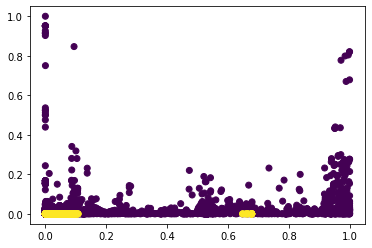

In [53]:
df.replace('NaN',0.0, inplace=True)
# using matplotlib is really important for a good visualisation
import matplotlib.pyplot as plt
plt.scatter(X[:,2] , X[:,3] , c = Y)

#### As  in Machine Learning models , we should split our data into a Trainning Set and a Test Set (so we get to use the Test Set for the evaluation of our model's performances at the end)

In [54]:
# train_test_split is the best method in sklean
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [55]:
# let's show the shape of our data after the split to make it more clear
print("X_Train size : ",X_train.shape)
print("X_Train size : ",X_test.shape)

X_train


X_Train size :  (13574, 4)
X_Train size :  (6686, 4)


array([[7.19997400e-03, 9.92644092e-01, 9.92644092e-01, 1.64903652e-02],
       [8.61396437e-04, 1.72502718e-06, 1.72502718e-06, 6.56919553e-04],
       [7.19997400e-03, 1.98828133e-04, 1.98828133e-04, 0.00000000e+00],
       ...,
       [8.99135353e-01, 1.50835710e-06, 1.50835710e-06, 5.05322733e-05],
       [8.61396437e-04, 4.09464786e-04, 4.09464786e-04, 5.39010915e-04],
       [9.50770381e-01, 1.54169096e-06, 1.54169096e-06, 1.01064547e-04]])

#### Now it's time to create our model.
we can implement KNN classifer from sk learn 

In [56]:
# implementation of the  KNN classifier as it is our chosen algorithm
from sklearn.neighbors import KNeighborsClassifier

#### As we know, the choice of the best K (number of neighbours) is the hard part of the process. The solution here is to use different K until we find the right one .

In [57]:
# we are going to use accuracy_score to evaluat our model performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [58]:
# use a loop to make it  easier
# let's show our matrix accuracy for a better detection
for i in range(1 , 13 , 2):
    model    = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    predect  = model.predict(X_test)
    TN, FP, FN, TP = confusion_matrix(Y_test, predect).ravel()
    print("For K = " ,i ,"The Accuracy  : ",accuracy_score(Y_test, predect)," The Detection Rate : ",TP/(TP+FN))

For K =  1 The Accuracy  :  0.992820819623093  The Detection Rate :  0.9730337078651685
For K =  3 The Accuracy  :  0.9911755907867185  The Detection Rate :  0.9730337078651685
For K =  5 The Accuracy  :  0.9880346993718218  The Detection Rate :  0.9483146067415731
For K =  7 The Accuracy  :  0.9872868680825606  The Detection Rate :  0.9483146067415731
For K =  9 The Accuracy  :  0.9866886030511517  The Detection Rate :  0.952808988764045
For K =  11 The Accuracy  :  0.9845946754412205  The Detection Rate :  0.9348314606741573


#### As we can see our model has  good performances when it comes to the detection which means the model is ready to be used with different packets.
And here is an example:

In [59]:
data = {
    
    'packet1': [80,  5985847, 0 , 24],
    'packet2': [80, 7554384 , 354 , 6],
    'packet3': [55054, 109 , 1 , 6]
    
}
test = pd.DataFrame(pd.DataFrame.from_dict(data, orient='index',  columns=['Destination Port', 'Flow Duration', 'Total Backward Packets' , 'Total Length of Fwd Packets']))

In [60]:
# let's see our new new data
test

,Destination Port,Flow Duration,Total Backward Packets,Total Length of Fwd Packets
packet1,80,5985847,0,24
packet2,80,7554384,354,6
packet3,55054,109,1,6


In [61]:
# let's change it into one numpy array  normalize  it
X_new = np.array([[i , j , k , z] for i , j , k , z in zip(test['Destination Port'].to_list() , test['Flow Duration'].to_list() , test['Total Backward Packets'].to_list() , test['Total Length of Fwd Packets'].to_list())])
X_new_norml = min_max_scaller.transform(X_new)

In [62]:
# now let's use it in our data
new_predect = model.predict(X_new_norml)
new_predect

array([0., 1., 0.])

#### As we can see our model is succefully built and ready to be used.